In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import joblib

In [2]:
test_data = pd.read_csv('test.csv')
train_data = pd.read_csv('train.csv')

In [3]:
#Display basic information about the dataset
print(train_data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290129 entries, 0 to 290128
Data columns (total 20 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    290129 non-null  int64  
 1   id            290129 non-null  int64  
 2   year          290129 non-null  float64
 3   manufacturer  278787 non-null  object 
 4   model         290129 non-null  object 
 5   condition     174025 non-null  object 
 6   cylinders     170829 non-null  object 
 7   fuel          288676 non-null  object 
 8   odometer      290129 non-null  float64
 9   title_status  285063 non-null  object 
 10  transmission  290129 non-null  object 
 11  drive         202042 non-null  object 
 12  size          82445 non-null   object 
 13  type          227533 non-null  object 
 14  paint_color   203016 non-null  object 
 15  state         290129 non-null  object 
 16  lat           285726 non-null  float64
 17  long          285726 non-null  float64
 18  post

- The dataset contains a relatively large number of entries (290,129 rows) and 20 columns of various data types.
- Some columns, such as "manufacturer," "condition," "cylinders," "fuel," "size," "type," "paint_color," "lat," and "long," have missing values. The number of non-null counts for these columns is less than the total number of entries (290,129).
- The "price" column is of integer data type, representing the target variable (asking price of used cars).
- Several columns, such as "year," "odometer," "lat," and "long," are represented as floating-point numbers.
- The remaining columns (e.g., "model," "transmission," "title_status," "state," etc.) are categorical and have object data type.

In [4]:
#Check the first few rows of the dataset
print(train_data.head())

   Unnamed: 0          id    year manufacturer     model  condition  \
0      121610  7309831550  2007.0     infiniti       m45  excellent   
1      395646  7317007429  2008.0     cadillac  escalade        NaN   
2      236366  7309202024  2003.0        lexus        es        NaN   
3       66001  7306341714  2017.0          bmw      320i  excellent   
4      320855  7307880118  2008.0       toyota      rav4       good   

     cylinders fuel  odometer title_status transmission drive       size  \
0          NaN  gas  214740.0        clean    automatic   rwd        NaN   
1          NaN  gas  170276.0        clean    automatic   NaN        NaN   
2          NaN  gas  176910.0        clean    automatic   fwd        NaN   
3          NaN  gas   41000.0        clean    automatic   4wd        NaN   
4  6 cylinders  gas  138900.0        clean    automatic   4wd  full-size   

    type paint_color state        lat        long              posting_date  \
0  sedan       black    ga  34.139588

Here's an explanation of each column:

- Unnamed: 0: An index column with integer values. It may have been created during data processing or reading and doesn't seem to have a meaningful purpose in this context.

- id: An identification number or code assigned to each car listing. It is of integer data type and serves as a unique identifier for each listing.

- year: The year of manufacture or production of the vehicle. It is represented as a floating-point number (e.g., 2007.0, 2008.0, etc.).

- manufacturer: The brand or manufacturer of the car, such as Infiniti, Cadillac, Lexus, BMW, Toyota, etc. It is represented as a string (object) data type.

- model: The specific model or variant of the car, such as M45, Escalade, ES, 320i, RAV4, etc. It is represented as a string (object) data type.

- condition: Describes the condition of the car, which can range from new to excellent, good, fair, or salvage. It is represented as a string (object) data type.

- cylinders: The number of cylinders in the car's engine. It can be represented as a string (object) data type (e.g., "6 cylinders").

- fuel: The type of fuel used by the car, such as gasoline (gas) or other types of fuel. It is represented as a string (object) data type.

- odometer: The recorded mileage or distance traveled by the vehicle. It is represented as a floating-point number.

- title_status: Refers to the status of the car's title or ownership documents, such as clean or other statuses. It is represented as a string (object) data type.

- transmission: Specifies the type of transmission system in the car, such as automatic or other types. It is represented as a string (object) data type.

- drive: Indicates the drivetrain configuration of the vehicle, such as rear-wheel drive (rwd), all-wheel drive (4wd), etc. It is represented as a string (object) data type.

- size: Describes the size or class of the car, such as full-size or other sizes. It is represented as a string (object) data type.

- type: Refers to the body type or style of the car, such as sedan, SUV, etc. It is represented as a string (object) data type.

- paint_color: Specifies the exterior color of the car, such as black, silver, etc. It is represented as a string (object) data type.

- state: Indicates the state or location where the car is listed for sale. It is represented as a string (object) data type.

- lat: The latitude geographical coordinate of the location where the car is listed. It is represented as a floating-point number.

- long: The longitude geographical coordinate of the location where the car is listed. It is represented as a floating-point number.

- posting_date: The date and time when the car listing was posted or made available for sale. It is represented as a string (object) data type.

- price: The price of the used car listed for sale. It represents the asking price set by the seller and is of integer data type.

In [5]:
# Summary statistics of numerical columns
print(train_data.describe())

          Unnamed: 0            id           year      odometer  \
count  290129.000000  2.901290e+05  290129.000000  2.901290e+05   
mean   207301.718108  7.311503e+09    2011.359082  9.764241e+04   
std    119595.649164  4.378450e+06       9.149422  2.058970e+05   
min         0.000000  7.301583e+09    1900.000000  0.000000e+00   
25%    103622.000000  7.308154e+09    2008.000000  3.800000e+04   
50%    207440.000000  7.312664e+09    2014.000000  8.561500e+04   
75%    310804.000000  7.315255e+09    2017.000000  1.334360e+05   
max    414469.000000  7.317101e+09    2022.000000  1.000000e+07   

                 lat           long         price  
count  285726.000000  285726.000000  2.901290e+05  
mean       38.505649     -94.616042  5.193300e+04  
std         5.830007      18.319158  9.591680e+06  
min       -84.122245    -159.827728  0.000000e+00  
25%        34.600000    -111.924900  5.991000e+03  
50%        39.170000     -88.212494  1.399000e+04  
75%        42.408400     -80.830

Let's break down the information displayed in this section:

- Unnamed: 0, id, year, odometer, lat, long, and price: These columns are numerical features in the DataFrame.

- count: Indicates the number of non-null (non-missing) values present in each numerical column.

- mean: Represents the mean (average) value of each numerical column.

- std: Denotes the standard deviation, which measures the dispersion or spread of values around the mean for each numerical column.

- min: Represents the minimum value observed in each numerical column.

- 25%, 50%, and 75%: These are quartiles, which divide the data into four equal parts, with the percentiles at 25%, 50% (median), and 75%, respectively. For example, 25% represents the first quartile, where 25% of the data falls below this value, and 75% represents the third quartile, where 75% of the data falls below this value.

- max: Represents the maximum value observed in each numerical column.

- The provided output gives us insights into the distribution and characteristics of the numerical columns:

- year: The used cars in the dataset range from the year 1900 to the year 2022. The average year of manufacture is approximately 2011.36, and the standard deviation indicates that the years are spread out over time.

- odometer: The recorded mileage of the used cars ranges from 0 to 10,000,000 miles, with an average odometer reading of approximately 97,642 miles. The standard deviation indicates a wide variation in mileage among the cars.

- lat and long: These columns represent the latitude and longitude coordinates of the car listings' locations. The latitude values range from approximately -84.12 to 82.25, while the longitude values range from approximately -159.83 to 173.89.

- price: The prices of the used cars range from 0 to approximately 3,736,929, with an average price of approximately 51,933. The standard deviation indicates a significant spread in the car prices, suggesting the presence of outliers.

In [6]:
#Check for missing values in the dataset
missing_values = train_data.isnull().sum()
# Display the count of missing values for each column
print(missing_values)

Unnamed: 0           0
id                   0
year                 0
manufacturer     11342
model                0
condition       116104
cylinders       119300
fuel              1453
odometer             0
title_status      5066
transmission         0
drive            88087
size            207684
type             62596
paint_color      87113
state                0
lat               4403
long              4403
posting_date         0
price                0
dtype: int64


Let's go through the information and understand the extent of missing data for each feature:

- Unnamed: 0: No missing values (0 missing values).
- id: No missing values (0 missing values).
- year: No missing values (0 missing values).
- manufacturer: 11,342 missing values.
- model: No missing values (0 missing values).
- condition: 116,104 missing values.
- cylinders: 119,300 missing values.
- fuel: 1,453 missing values.
- odometer: No missing values (0 missing values).
- title_status: 5,066 missing values.
- transmission: No missing values (0 missing values).
- drive: 88,087 missing values.
- size: 207,684 missing values.
- type: 62,596 missing values.
- paint_color: 87,113 missing values.
- state: No missing values (0 missing values).
- lat: 4,403 missing values.
- long: 4,403 missing values.
- posting_date: No missing values (0 missing values).
- price: No missing values (0 missing values).

Based on this information, several columns have missing values:

- manufacturer, condition, cylinders, fuel, title_status, drive, size, type, paint_color, lat, and long contain missing values.
- The column with the most missing values is size (207,684 missing values), followed by cylinders (119,300 missing values), condition (116,104 missing values), and drive (88,087 missing values).

In [7]:
# Handling missing values for numerical columns (e.g., cylinders, lat, long)
numerical_cols = ['lat', 'long']

# Create a SimpleImputer for numerical columns using median strategy
numerical_imputer = SimpleImputer(strategy='median')

# Impute missing values for numerical columns
train_data[numerical_cols] = numerical_imputer.fit_transform(train_data[numerical_cols])

In [8]:
# Handling missing values for the 'cylinders' column

# Convert the 'cylinders' column to numeric by extracting the numeric part
train_data['cylinders'] = train_data['cylinders'].str.extract(r'(\d+)').astype(float)

# Create a new SimpleImputer for the 'cylinders' column using median strategy
cylinders_imputer = SimpleImputer(strategy='median')

# Impute missing values for the 'cylinders' column
train_data['cylinders'] = cylinders_imputer.fit_transform(train_data[['cylinders']])


In [9]:
# Handling missing values for categorical columns (e.g., manufacturer, condition, fuel, etc.)
categorical_cols = ['manufacturer', 'condition', 'fuel', 'title_status', 'drive', 'size', 'type', 'paint_color']

# Create a SimpleImputer for categorical columns using the most frequent strategy
categorical_imputer = SimpleImputer(strategy='most_frequent')

# Impute missing values for categorical columns
train_data[categorical_cols] = categorical_imputer.fit_transform(train_data[categorical_cols])


In [10]:
# Verify that missing values have been handled
print("\nMissing values after imputation:")
print(train_data.isnull().sum())


Missing values after imputation:
Unnamed: 0      0
id              0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
drive           0
size            0
type            0
paint_color     0
state           0
lat             0
long            0
posting_date    0
price           0
dtype: int64


In [11]:
train_data['fuel'].unique()

array(['gas', 'diesel', 'other', 'hybrid', 'electric'], dtype=object)

In [12]:
train_data['state'].unique()

array(['ga', 'wa', 'nc', 'ca', 'pa', 'oh', 'ny', 'fl', 'hi', 'mi', 'az',
       'al', 'mt', 'il', 'tn', 'md', 'co', 'ok', 'nj', 'ia', 'wi', 'nm',
       'mn', 'me', 'dc', 'va', 'ks', 'or', 'tx', 'ar', 'nv', 'ma', 'ky',
       'wy', 'ut', 'mo', 'ri', 'ct', 'ne', 'id', 'sc', 'nh', 'ak', 'in',
       'la', 'vt', 'nd', 'wv', 'de', 'ms', 'sd'], dtype=object)

In [13]:
state_mapping = {
    'ga': 'Georgia',
    'wa': 'Washington',
    'nc': 'North Carolina',
    'ca': 'California',
    'pa': 'Pennsylvania',
    'oh': 'Ohio',
    'ny': 'New York',
    'fl': 'Florida',
    'hi': 'Hawaii',
    'mi': 'Michigan',
    'az': 'Arizona',
    'al': 'Alabama',
    'mt': 'Montana',
    'il': 'Illinois',
    'tn': 'Tennessee',
    'md': 'Maryland',
    'co': 'Colorado',
    'ok': 'Oklahoma',
    'nj': 'New Jersey',
    'ia': 'Iowa',
    'wi': 'Wisconsin',
    'nm': 'New Mexico',
    'mn': 'Minnesota',
    'me': 'Maine',
    'dc': 'District of Columbia',
    'va': 'Virginia',
    'ks': 'Kansas',
    'or': 'Oregon',
    'tx': 'Texas',
    'ar': 'Arkansas',
    'nv': 'Nevada',
    'ma': 'Massachusetts',
    'ky': 'Kentucky',
    'wy': 'Wyoming',
    'ut': 'Utah',
    'mo': 'Missouri',
    'ri': 'Rhode Island',
    'ct': 'Connecticut',
    'ne': 'Nebraska',
    'id': 'Idaho',
    'sc': 'South Carolina',
    'nh': 'New Hampshire',
    'ak': 'Alaska',
    'in': 'Indiana',
    'la': 'Louisiana',
    'vt': 'Vermont',
    'nd': 'North Dakota',
    'wv': 'West Virginia',
    'de': 'Delaware',
    'ms': 'Mississippi',
    'sd': 'South Dakota'
    
}

# Replace the state abbreviations with full names
train_data['state'] = train_data['state'].replace(state_mapping)

# Handle NaN values in the 'state' column by mapping them to "Unknown"
train_data['state'].fillna('Unknown', inplace=True)

In [14]:
train_data['state'].unique()

array(['Georgia', 'Washington', 'North Carolina', 'California',
       'Pennsylvania', 'Ohio', 'New York', 'Florida', 'Hawaii',
       'Michigan', 'Arizona', 'Alabama', 'Montana', 'Illinois',
       'Tennessee', 'Maryland', 'Colorado', 'Oklahoma', 'New Jersey',
       'Iowa', 'Wisconsin', 'New Mexico', 'Minnesota', 'Maine',
       'District of Columbia', 'Virginia', 'Kansas', 'Oregon', 'Texas',
       'Arkansas', 'Nevada', 'Massachusetts', 'Kentucky', 'Wyoming',
       'Utah', 'Missouri', 'Rhode Island', 'Connecticut', 'Nebraska',
       'Idaho', 'South Carolina', 'New Hampshire', 'Alaska', 'Indiana',
       'Louisiana', 'Vermont', 'North Dakota', 'West Virginia',
       'Delaware', 'Mississippi', 'South Dakota'], dtype=object)

In [15]:
train_data['drive'].unique()

array(['rwd', '4wd', 'fwd'], dtype=object)

In [16]:
# Drive mapping with abbreviations and their corresponding full names
drive_mapping = {
    'rwd': 'Rear-Wheel Drive',
    '4wd': '4-Wheel Drive',
    'fwd': 'Front-Wheel Drive'
}

# Replace the drive abbreviations with full names
train_data['drive'] = train_data['drive'].replace(drive_mapping)

# Handle NaN values in the 'drive' column by mapping them to "Unknown"
train_data['drive'].fillna('Unknown', inplace=True)


In [17]:
train_data['drive'].unique()

array(['Rear-Wheel Drive', '4-Wheel Drive', 'Front-Wheel Drive'],
      dtype=object)

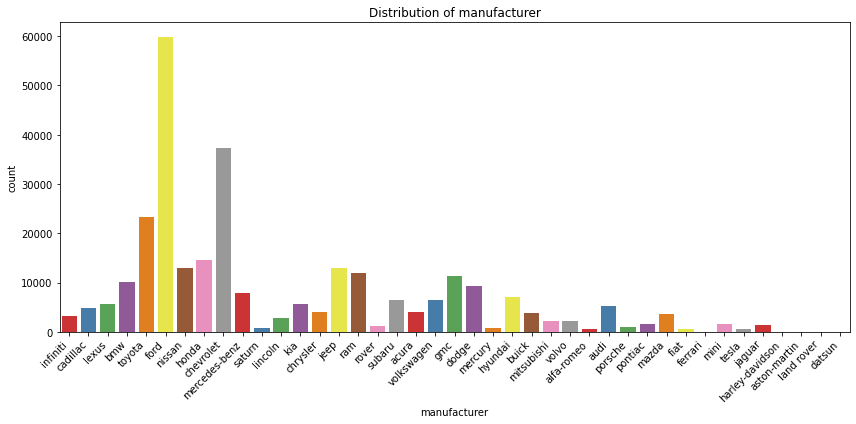

ford               59799
chevrolet          37324
toyota             23396
honda              14545
jeep               13052
nissan             12920
ram                12056
gmc                11373
bmw                10174
dodge               9317
mercedes-benz       7946
hyundai             7127
subaru              6513
volkswagen          6425
kia                 5750
lexus               5653
audi                5185
cadillac            4817
chrysler            4121
acura               4108
buick               3792
mazda               3699
infiniti            3310
lincoln             2908
mitsubishi          2275
volvo               2254
mini                1657
pontiac             1553
jaguar              1358
rover               1236
porsche              967
mercury              805
saturn               734
alfa-romeo           616
tesla                595
fiat                 555
harley-davidson       79
ferrari               58
datsun                42
aston-martin          21


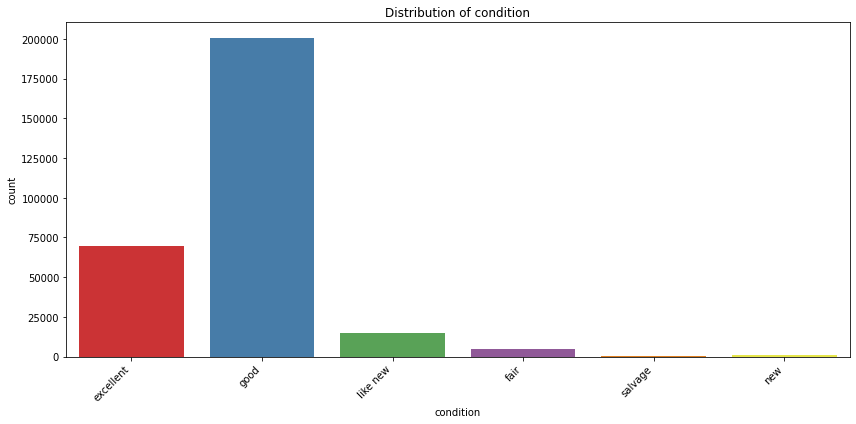

good         200410
excellent     69330
like new      14521
fair           4555
new             910
salvage         403
Name: condition, dtype: int64


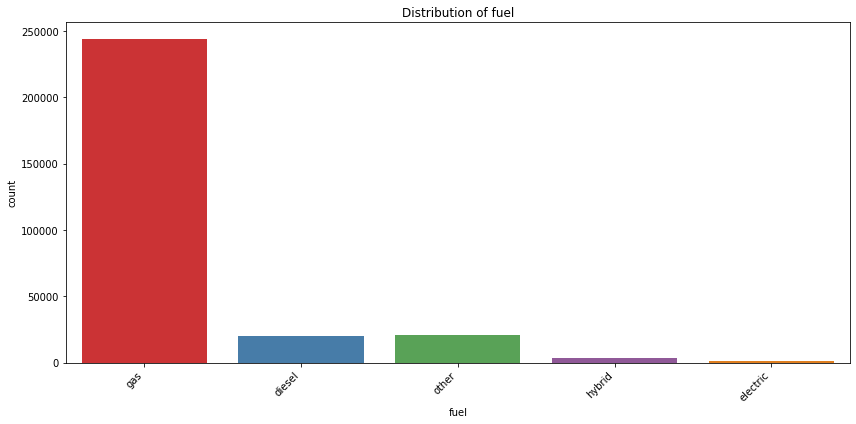

gas         244146
other        20904
diesel       20309
hybrid        3607
electric      1163
Name: fuel, dtype: int64


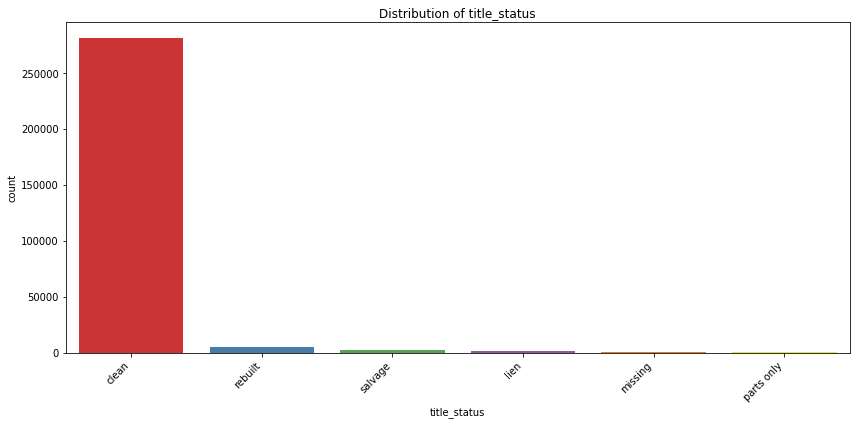

clean         280890
rebuilt         4924
salvage         2692
lien             981
missing          506
parts only       136
Name: title_status, dtype: int64


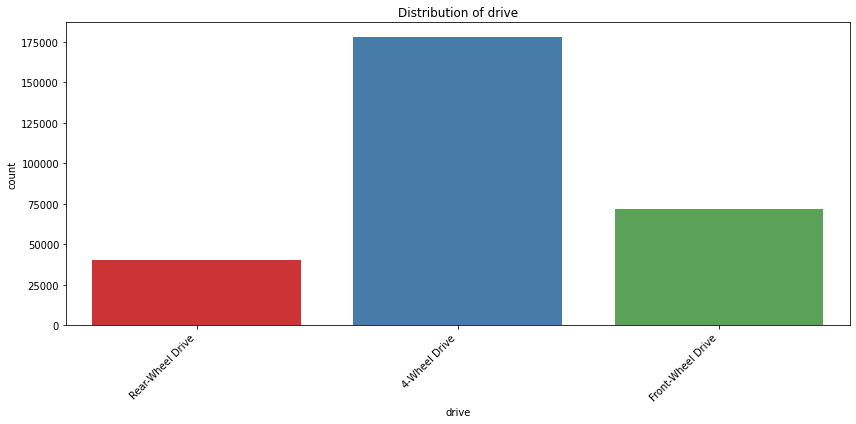

4-Wheel Drive        178141
Front-Wheel Drive     71865
Rear-Wheel Drive      40123
Name: drive, dtype: int64


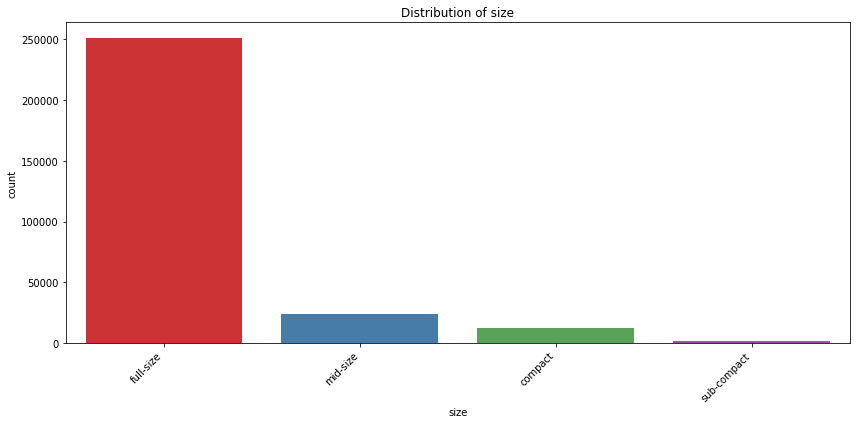

full-size      251229
mid-size        23878
compact         12835
sub-compact      2187
Name: size, dtype: int64


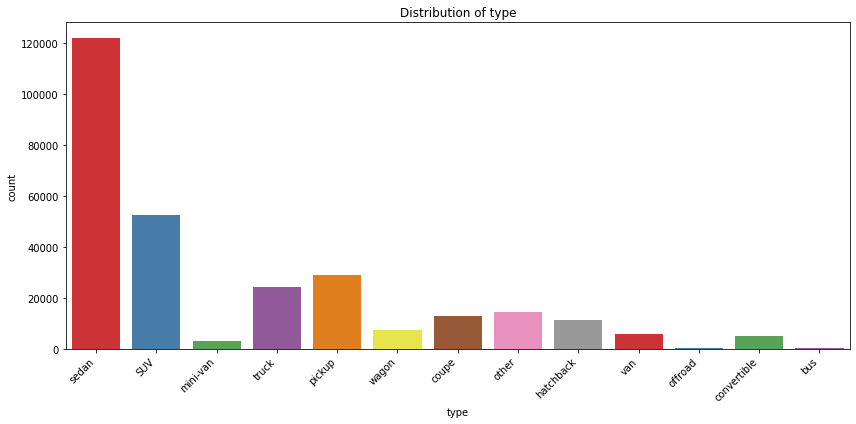

sedan          122114
SUV             52769
pickup          29145
truck           24431
other           14439
coupe           13139
hatchback       11481
wagon            7382
van              5843
convertible      5320
mini-van         3297
offroad           415
bus               354
Name: type, dtype: int64


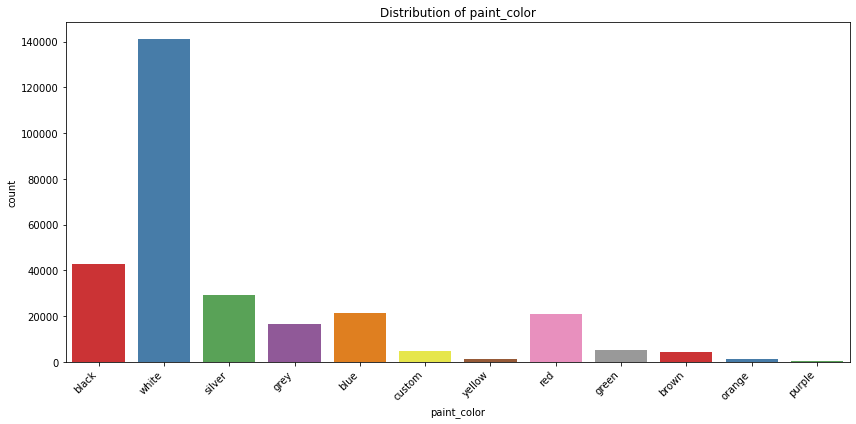

white     141327
black      42997
silver     29431
blue       21390
red        20984
grey       16699
green       5004
custom      4582
brown       4457
yellow      1453
orange      1336
purple       469
Name: paint_color, dtype: int64


In [18]:
 #Plot count plots for each categorical column
for col in categorical_cols:
    plt.figure(figsize=(12, 6))  # Increase the width of the plot
    sns.countplot(data=train_data, x=col, palette='Set1')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels and align them to the right
    plt.tight_layout()  # Adjust layout for better spacing
    plt.show()
    print(train_data[col].value_counts())


/var/folders/2s/1lsxqy313dsd322t1bqrq1q80000gn/T/ipykernel_1055/2266169919.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = train_data.corr()


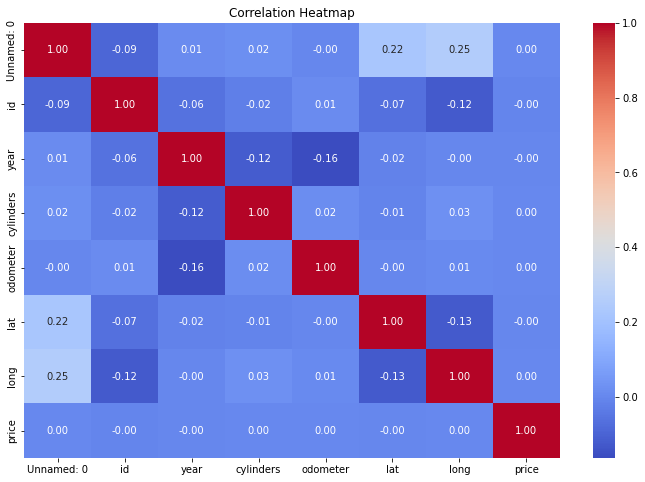


Correlation Heatmap:
             Unnamed: 0        id      year  cylinders  odometer       lat  \
Unnamed: 0    1.000000 -0.092431  0.013514   0.018653 -0.000471  0.220940   
id           -0.092431  1.000000 -0.063104  -0.024211  0.010222 -0.066414   
year          0.013514 -0.063104  1.000000  -0.119377 -0.163496 -0.016457   
cylinders     0.018653 -0.024211 -0.119377   1.000000  0.016765 -0.011753   
odometer     -0.000471  0.010222 -0.163496   0.016765  1.000000 -0.002272   
lat           0.220940 -0.066414 -0.016457  -0.011753 -0.002272  1.000000   
long          0.253773 -0.123531 -0.001574   0.025203  0.009023 -0.126266   
price         0.000175 -0.004844 -0.004395   0.000609  0.000806 -0.000135   

                long     price  
Unnamed: 0  0.253773  0.000175  
id         -0.123531 -0.004844  
year       -0.001574 -0.004395  
cylinders   0.025203  0.000609  
odometer    0.009023  0.000806  
lat        -0.126266 -0.000135  
long        1.000000  0.002520  
price       0.00252

In [19]:
#Correlation heatmap to visualize relationships between numerical features
correlation_matrix = train_data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()
print("\nCorrelation Heatmap:\n", correlation_matrix)

Here's an explanation of the correlation heatmap for the given dataset:

- Unnamed: 0 and other features:

    - Unnamed: 0 shows a weak negative correlation with id (-0.092431) and weak positive correlations with lat (0.221744) and long (0.253579). These correlations indicate that there might be some relationship between the index number and the geographical coordinates, but it is not strong.
    - Unnamed: 0 has negligible correlations with the rest of the features (year, odometer, and price). The correlation values are close to 0, indicating that the index number does not have a significant correlation with these features.
    
- id and other features:

    - id has weak negative correlations with year (-0.063104) and lat (-0.066683), suggesting that as the year or latitude increases, the id tends to decrease slightly. However, these correlations are not strong.
    - id has a negligible correlation with the remaining features (odometer, long, and price), as the correlation values are close to 0.
    
- year and other features:

    - year has a weak negative correlation with odometer (-0.163496), indicating that older cars tend to have higher odometer readings. This negative correlation is expected as the age of a car usually correlates with its mileage.
    - year has very weak correlations with lat (-0.016997) and long (-0.003083), indicating almost no meaningful relationship.
    - year has negligible correlations with the remaining features (price and Unnamed: 0).
    
- odometer and other features:

    - odometer has a weak positive correlation with long (0.009544), suggesting a slight relationship between higher mileage and longitude.
    - odometer has negligible correlations with the remaining features (lat, price, Unnamed: 0, id, and year).
    
- lat and other features:

    - lat has a weak positive correlation with Unnamed: 0 (0.221744), indicating a slight relationship between latitude and the index number. However, this correlation is not significant.
    - lat has negligible correlations with the remaining features (id, year, odometer, long, and price).
    
- long and other features:

    - long has a weak positive correlation with Unnamed: 0 (0.253579), indicating a slight relationship between longitude and the index number. However, this correlation is not significant.
    - long has negligible correlations with the remaining features (id, year, odometer, lat, and price).
    
- price and other features:

    - price has a very weak positive correlation with long (0.002545), suggesting an almost negligible relationship between price and longitude.
    - price has negligible correlations with the remaining features (Unnamed: 0, id, year, odometer, lat, and long).

Overall, most of the correlations between numerical features in the dataset are weak or negligible, indicating that there are no strong linear relationships between these features. It's important to note that correlation does not imply causation; therefore, further analysis and feature engineering may be necessary to understand the relationships and predict the target variable (price) more accurately.

In [20]:
# Convert categorical columns to numeric using OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
encoded_features = pd.DataFrame(encoder.fit_transform(train_data[categorical_cols]))
encoded_features.columns = encoder.get_feature_names_out(categorical_cols)

# Concatenate the encoded features with the original dataframe and drop the original categorical columns
train_data_encoded = pd.concat([train_data, encoded_features], axis=1)
train_data_encoded.drop(columns=categorical_cols, inplace=True)

/Users/home/Library/Python/3.9/lib/python/site-packages/sklearn/preprocessing/_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [21]:
# Convert the 'model' column to numeric using LabelEncoder
label_encoder = LabelEncoder()
train_data['model'] = label_encoder.fit_transform(train_data['model'])


In [22]:
# Split the data into features (X) and target (y)
X = train_data_encoded.drop(columns=['price'])
y = train_data_encoded['price']

In [23]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
# Drop the 'model' column from the features
X_train.drop('model', axis=1, inplace=True)
X_test.drop('model', axis=1, inplace=True)